<h1><b>Task 1:Prediction using Supervised Machine Learning</b></h1>

To predict the percentage of marks that a student is expected to score based upon the number of hours they studied using Linear Regression.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

<h2><b>Reading the data from source</b></h2>

In [2]:
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
dataset = pd.read_csv(url)
print('Data imported successfully')

dataset.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<h2><b>Input data Visualisation</b></h2>

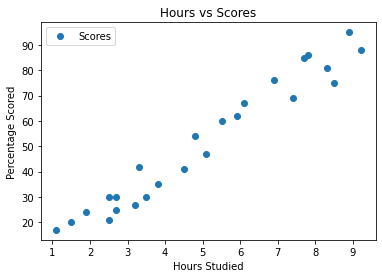

In [3]:
dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

<h2><b>Data preprocessing</b></h2>

In [4]:
X=dataset.iloc[:, :-1].values
y=dataset.iloc[: , 1].values

<h2><b>Model training</b></h2>

Splitting the data into training and testing sets, and training the algorithm.

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
linear = LinearRegression()
linear.fit(X_train,y_train)

print('Training complete')

Training complete


<h2><b>Plotting the line of regression</b></h2>

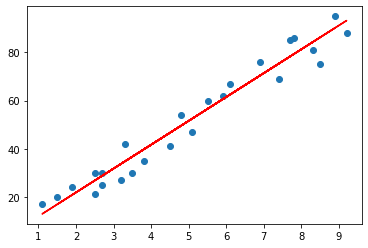

In [6]:
line=linear.coef_*X+linear.intercept_
plt.scatter(X,y)
plt.plot(X,line,color='red')
plt.show()

<h2><b>Making predictions</b></h2>

Now that we have trained our algorithm, it's time to test the model by making some predictions.

For this we will use our test-set data

In [7]:
y_pred=linear.predict(X_test)

<h2><b>Comparing Actual result to the Predicted Model result</b></h2>

In [8]:
predict=pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred})
predict

,Actual value,Predicted value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [9]:
print("Training Score:",linear.score(X_train,y_train))
print("Test Score:",linear.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


In [10]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = linear.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


<h2><b>Evaluating the model</b></h2>

Here different errors have been calculated to compare the model performance and predict the accuracy.

In [11]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356


<b>R-2 gives the score of model fit and in this case we have R-2 = 0.9454906892105355 which is actually a great score for this model</b>